# TranslitDemo

In this notebook, I test my transliteration processing methods and write comments on the results.

## Setup

Here, I install and import the necessary packages.

In [1]:
%%capture
!sudo apt-get install tesseract-ocr-vie
!sudo apt-get install tesseract-ocr-lav
!sudo apt-get install tesseract-ocr-yor
!sudo apt-get install tesseract-ocr-ces
!pip3 install pytesseract
!pip install PyMuPDF
!pip install langdetect

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr
!ls

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr
bert_out			  handbook_out
CorrectnessCheck.ipynb		  handbook_out2
correctness_check_results.pickle  large_sample_out
DatasetMake.ipynb		  large_sample.pdf
development_sample1.pdf		  LargeSampleReport.ipynb
development_sample2.pdf		  OCRDemo2.ipynb
development_sample_out		  PreliminaryPerformanceAnalysis.ipynb
development_sample_out2		  __pycache__
development_sample_out3		  snippets
development_sample_out4		  temp
development_sample_out5		  tesseract_manager.py
development_sample_out6		  TesseractManagerTests.ipynb
development_sample_out7		  TranslitDemo.ipynb
development_sample.pdf		  translit.py


In [20]:
from PIL import Image
import matplotlib.pyplot as plt
import translit

In [66]:
def run(n):
  """Runs translit.translit on the nth test case."""
  im = Image.open('snippets/translit_sample_{}.png'.format(n))
  print(translit.translit(im))
  plt.figure(figsize=(14, 14))
  plt.imshow(im)
  plt.show()

## Tests

DEBUG: chars=[('ces', '1'), ('eng', '1'), ('lav', '1'), ('yor', '1'), ('vie', '1')], choosing 1
DEBUG: chars=[('ces', '4'), ('eng', '4'), ('lav', '4'), ('yor', '4'), ('vie', '4')], choosing 4
DEBUG: chars=[('ces', '4'), ('eng', '4'), ('lav', '4'), ('yor', '4'), ('yor', '4'), ('vie', '4')], choosing 4
DEBUG: chars=[('ces', 'D'), ('eng', 'D'), ('lav', 'D'), ('yor', 'D')], choosing D
DEBUG: chars=[('ces', 'I'), ('eng', 'I'), ('lav', 'I'), ('yor', 'I')], choosing I
DEBUG: chars=[('ces', 'Š'), ('eng', 'S'), ('lav', 'Š'), ('yor', 'S')], choosing Š
DEBUG: chars=[('ces', 'S'), ('eng', 'S'), ('lav', 'S')], choosing S
DEBUG: chars=[('ces', 'A'), ('eng', 'A'), ('lav', 'A'), ('yor', 'A')], choosing A
DEBUG: chars=[('ces', 'S'), ('lav', 'S'), ('yor', 'S')], choosing S
DEBUG: chars=[('ces', 'A'), ('lav', 'A'), ('yor', 'A')], choosing A
DEBUG: chars=[('ces', 'G'), ('eng', 'G'), ('lav', 'G'), ('yor', 'G')], choosing G
DEBUG: chars=[('ces', '.'), ('eng', '.'), ('lav', '.'), ('yor', '.'), ('vie', '.')],

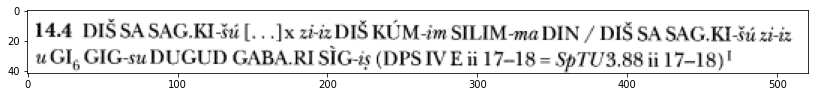

In [36]:
run(1)

### Try 1 (2021 June 10 15:35)

Errors:
* miss '.'
* miss ' '
* '-' to ' '
* miss '..]'
* miss '-'
* insert ' '
* miss 'I-'
* miss '-'
* 'Ì' to 'Ī'
* 'ṣ' to 's'
* miss '='
* miss superscript

Verdict: Image quality poor.

DEBUG: chars=[('ces', '1'), ('eng', '1'), ('lav', '1'), ('yor', '1'), ('vie', '1')], choosing 1
DEBUG: chars=[('ces', '4'), ('lav', '4'), ('yor', '4'), ('vie', '4')], choosing 4
DEBUG: chars=[('ces', '.'), ('eng', '.'), ('lav', '.'), ('yor', '.'), ('vie', '.')], choosing .
DEBUG: chars=[('ces', '4'), ('eng', '4'), ('lav', '4'), ('yor', '4'), ('vie', '4')], choosing 4
DEBUG: chars=[('ces', 'D'), ('eng', 'D'), ('lav', 'D'), ('yor', 'D')], choosing D
DEBUG: chars=[('ces', 'I'), ('lav', 'I')], choosing I
DEBUG: chars=[('ces', 'Š'), ('eng', 'S'), ('lav', 'Š'), ('yor', 'S')], choosing Š
DEBUG: chars=[('ces', 'S'), ('eng', 'S'), ('lav', 'S'), ('yor', 'S')], choosing S
DEBUG: chars=[('ces', 'A'), ('eng', 'A'), ('lav', 'A'), ('yor', 'A')], choosing A
DEBUG: chars=[('ces', 'S'), ('eng', 'S'), ('lav', 'S'), ('yor', 'S')], choosing S
DEBUG: chars=[('ces', 'A'), ('eng', 'A'), ('lav', 'A'), ('yor', 'A')], choosing A
DEBUG: chars=[('ces', 'G'), ('eng', 'G'), ('lav', 'G'), ('yor', 'G')], choosing G
DE

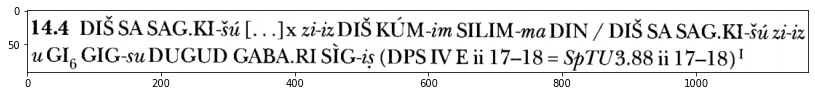

In [37]:
run(2)

### Try 1 (2021 June 10 15:35)

Errors:
* insert ' '
* miss 'i' (cause: miss in flagship language)
* subscript to ','
* 'Ì' to 'Í' (cause: Tiếng Việt charbox not match)
* miss ' '
* superscript to !

Verdict:
* issues trace to initial character segmentation

DEBUG: chars=[('ces', 't'), ('eng', 't'), ('lav', 't'), ('yor', 't')], choosing t
DEBUG: chars=[('ces', 'o'), ('eng', 'o'), ('lav', 'o'), ('yor', 'o')], choosing o
DEBUG: chars=[('ces', 't'), ('eng', 't'), ('lav', 't'), ('yor', 't')], choosing t
DEBUG: chars=[('ces', 'h'), ('eng', 'h'), ('lav', 'h'), ('yor', 'h')], choosing h
DEBUG: chars=[('ces', 'e'), ('eng', 'e'), ('lav', 'e'), ('yor', 'e')], choosing e
DEBUG: chars=[('ces', 'o'), ('eng', 'o'), ('lav', 'o'), ('yor', 'o')], choosing o
DEBUG: chars=[('ces', 'n'), ('eng', 'n'), ('lav', 'n'), ('yor', 'n')], choosing n
DEBUG: chars=[('ces', 'e'), ('eng', 'e'), ('lav', 'e'), ('yor', 'e')], choosing e
DEBUG: chars=[('ces', 'f'), ('eng', 'f'), ('lav', 'f'), ('yor', 'f')], choosing f
DEBUG: chars=[('ces', 'o'), ('eng', 'o'), ('lav', 'o'), ('yor', 'o')], choosing o
DEBUG: chars=[('ces', 'u'), ('eng', 'u'), ('lav', 'u'), ('yor', 'u')], choosing u
DEBUG: chars=[('ces', 'n'), ('eng', 'n'), ('lav', 'n'), ('yor', 'n')], choosing n
DEBUG: chars=[('

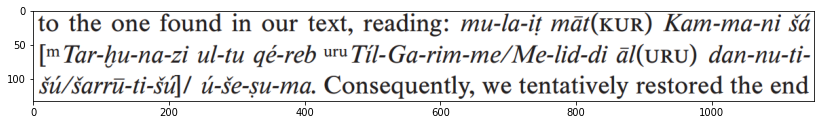

In [38]:
run(3)

### Try 1 (2021 June 10 15:42)

Errors:
* 'ṭ' to 't' (cause: no attempt at support)
* superscript to '©'
* 'ḫ' to 'ḫ' (cause: no attempt at support)
* 'q' to 'g' (this is DISTURBING)
* superscript to 'wu'
* ']' to 'l'
* 'q' to 'g'

Verdict:
* Even English fails to pick up 'q' -- maybe because 'q' is too uncommon and useless
* must support sub/superscript + ṭ + ḫ

DEBUG: chars=[('ces', '1'), ('eng', '1'), ('lav', '1'), ('yor', '1'), ('vie', '1')], choosing 1
DEBUG: chars=[('ces', '4'), ('eng', '4'), ('lav', '4'), ('yor', '4'), ('vie', '4')], choosing 4
DEBUG: chars=[('ces', '.'), ('eng', '.'), ('lav', '.'), ('yor', '.'), ('vie', '.')], choosing .
DEBUG: chars=[('ces', '2'), ('eng', '2'), ('lav', '2'), ('yor', '2'), ('vie', '2')], choosing 2
DEBUG: chars=[('ces', 'D'), ('eng', 'D'), ('lav', 'D'), ('yor', 'D')], choosing D
DEBUG: chars=[('ces', 'I'), ('eng', 'I'), ('lav', 'Ī'), ('yor', 'I')], choosing Ī
DEBUG: chars=[('ces', 'Š'), ('eng', 'S'), ('lav', 'Š'), ('yor', 'S')], choosing Š
DEBUG: chars=[('ces', 'N'), ('eng', 'N'), ('lav', 'N'), ('yor', 'N')], choosing N
DEBUG: chars=[('ces', 'A'), ('eng', 'A'), ('lav', 'A'), ('yor', 'A')], choosing A
DEBUG: chars=[('ces', 'a'), ('lav', 'a'), ('yor', 'a')], choosing a
DEBUG: chars=[('ces', 's'), ('eng', '-'), ('lav', '-')], choosing -
DEBUG: chars=[('ces', 's'), ('eng', 's'), ('lav', 's'), ('yor', 's')],

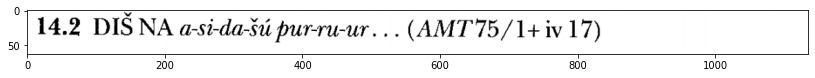

In [39]:
run(4)

### Try 1 (2021 June 10 15:49)

Errors:
* 'I' to 'Ī'

Verdict:
* tempting to say inevitable: OCR in many languages, and one gives noise.

DEBUG: chars=[('ces', '1'), ('eng', '1'), ('lav', '1'), ('yor', '1'), ('vie', '1')], choosing 1
DEBUG: chars=[('ces', '4'), ('eng', '4'), ('lav', '4'), ('yor', '4'), ('vie', '4')], choosing 4
DEBUG: chars=[('ces', '.'), ('eng', '.'), ('lav', '.'), ('yor', '.'), ('vie', '.')], choosing .
DEBUG: chars=[('ces', '3'), ('eng', '3'), ('lav', '3'), ('yor', '3'), ('vie', '3')], choosing 3
DEBUG: chars=[('ces', 'D'), ('eng', 'D'), ('lav', 'D'), ('yor', 'D')], choosing D
DEBUG: chars=[('ces', 'I'), ('eng', 'I'), ('lav', 'I'), ('yor', 'I')], choosing I
DEBUG: chars=[('ces', 'Š'), ('eng', 'S'), ('lav', 'Š')], choosing Š
DEBUG: chars=[('ces', 'N'), ('eng', 'N'), ('lav', 'N')], choosing N
DEBUG: chars=[('ces', 'A'), ('eng', 'A'), ('lav', 'A'), ('yor', 'A')], choosing A
DEBUG: chars=[('ces', 'a'), ('lav', 'a'), ('yor', 'a')], choosing a
DEBUG: chars=[('ces', '-'), ('eng', '-'), ('lav', '-'), ('yor', '-'), ('vie', '-')], choosing -
DEBUG: chars=[('ces', 's'), ('eng', 's'), ('lav', 's'), ('yor', 's')],

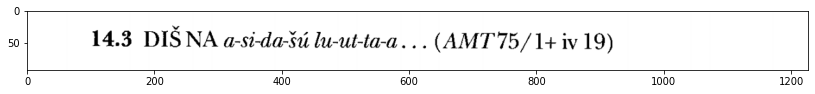

In [40]:
run(5)

### Try 1 (2021 June 10 15:51)

Errors:
* insert '\''

Verdict:
* This is fine.

DEBUG: chars=[('ces', '1'), ('eng', '1'), ('lav', '1'), ('yor', '1'), ('vie', '1')], choosing 1
DEBUG: chars=[('ces', '4'), ('eng', '4'), ('yor', '4'), ('vie', '4')], choosing 4
DEBUG: chars=[('ces', '.'), ('eng', '.'), ('lav', '.'), ('vie', '.')], choosing .
DEBUG: chars=[('ces', '5'), ('eng', '5'), ('lav', '5'), ('yor', '5'), ('vie', '5')], choosing 5
DEBUG: chars=[('ces', 'D'), ('eng', 'D'), ('lav', 'D'), ('yor', 'D')], choosing D
DEBUG: chars=[('ces', 'I'), ('eng', 'I'), ('lav', 'I'), ('yor', 'I')], choosing I
DEBUG: chars=[('ces', 'Š'), ('eng', 'S'), ('lav', 'Š'), ('yor', 'S')], choosing Š
DEBUG: chars=[('ces', 'I'), ('eng', 'I'), ('lav', 'I')], choosing I
DEBUG: chars=[('ces', 'G'), ('yor', 'G')], choosing G
DEBUG: chars=[('ces', 'I'), ('eng', 'I'), ('lav', 'I')], choosing I
DEBUG: chars=[('ces', '"'), ('eng', '"'), ('lav', '"')], choosing "
DEBUG: chars=[('ces', '-'), ('eng', '-'), ('yor', '-'), ('vie', '-')], choosing -
DEBUG: chars=[('ces', 'š')], choosing š
DEBUG: chars=[('ce

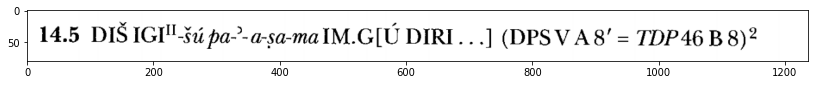

In [41]:
run(6)

### Try 1 (2021 June 10 15:53)

Errors:
* superscript to '"'
* 'ú' to 'ū' (cause: noise from lat + vie)
* miss 'p' (DISTURBING)
* miss 'ʾ' (cause: no support yet)
* miss ' '
* miss ' '
* superscript to *

Verdict:
* must support 'ʾ' and superscripts

DEBUG: chars=[('ces', '1'), ('eng', '1'), ('lav', '1'), ('yor', '1'), ('vie', '1')], choosing 1
DEBUG: chars=[('ces', '4'), ('eng', '4'), ('lav', '4'), ('yor', '4'), ('vie', '4')], choosing 4
DEBUG: chars=[('ces', '.'), ('eng', '.'), ('lav', '.'), ('yor', '.'), ('vie', '.')], choosing .
DEBUG: chars=[('ces', '6'), ('eng', '6'), ('lav', '6'), ('yor', '6'), ('vie', '6')], choosing 6
DEBUG: chars=[('ces', 'D'), ('eng', 'D'), ('lav', 'D'), ('yor', 'D')], choosing D
DEBUG: chars=[('ces', 'I'), ('eng', 'I'), ('yor', 'I')], choosing I
DEBUG: chars=[('ces', 'Š'), ('eng', 'S'), ('lav', 'Š'), ('yor', 'S')], choosing Š
DEBUG: chars=[('ces', 'G'), ('eng', 'G'), ('lav', 'G'), ('yor', 'G')], choosing G
DEBUG: chars=[('ces', 'E'), ('eng', 'E'), ('lav', 'E'), ('yor', 'E')], choosing E
DEBUG: chars=[('ces', 'Š'), ('eng', 'S')], choosing Š
DEBUG: chars=[('ces', 'T'), ('eng', 'T'), ('lav', 'T'), ('yor', 'T')], choosing T
DEBUG: chars=[('ces', 'U'), ('eng', 'U'), ('yor', 'U')], choosing U
DEBUG: chars=[('

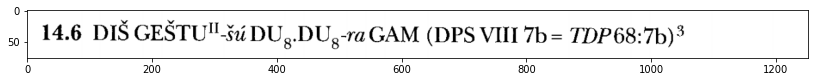

In [42]:
run(7)

### Try 1 (2021 June 10 15:58)

Errors:
* superscript to '\''
* 'U' to ';' (DISTURBING)
* subscript to ';'
* miss ' '
* superscript to '*'

Verdict:
* The character box for the 'U' had zero width! This is not okay. >:(
  * all boxes should be widened by one-quarter the median height on both the left and right.
  * (I have also noticed that the char boxes seem oddly left-shifted.)


In [67]:
for i in range(8, 37): run(i)

Output hidden; open in https://colab.research.google.com to view.

Problem: Unable to distinguish between grave and macron because lav is the only source of macrons and vie is the only source of graves.

Problem: Must remove circle above. That isn't used in translit of Semitic.

Problem: Trouble with q's.

Problem: Must remove lav char with mark under (e.g., 'ļ')

Problem: i with inverted breve under not supported

Must widen char boxes